In [4]:
#匯入套件
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from geopy.distance import geodesic

# 個高鐵站經緯度資訊
locations = {
    'Taipei High Speed Rail Station': (25.04727, 121.51764), #台北高鐵站
    'Miaoli High Speed Rail Station': (24.60571, 120.82548), #苗栗高鐵站
    'Yunlin High Speed Rail Station': (23.7363, 120.4165), #雲林高鐵站
    'Tainan High Speed Rail Station': (22.92464, 120.28566), #台南高鐵站
    'Kaohsiung High Speed Rail Station': (22.68784, 120.30912), #高雄高鐵站
    'Hualien Fengbin': (23.58519, 121.50274), #花蓮豐濱
    'Taitung Luye': (22.95514, 121.15777) #台東鹿野
}

# 計算距離矩陣
num_locations = len(locations) #取得locations長度
distance_matrix = np.zeros((num_locations, num_locations))
#外層迴圈使用該enumerate函數來迭代locations字典。它為每次迭代分配索引i和元組(loc1, coord1)。
for i, (loc1, coord1) in enumerate(locations.items()): 
    #內層迴圈還使用該enumerate函數迭代locations字典。它為每次迭代分配索引j和元組(loc2, coord2)。
    for j, (loc2, coord2) in enumerate(locations.items()):
        #使用geodesic公式計算兩點之間的最短距離。返回的距離以公里為單位。
        distance = geodesic(coord1, coord2).kilometers
        #計算出的距離存儲在distance_matrix索引陣列
        distance_matrix[i, j] = distance

In [71]:
print("MDS降維度前的距離差:\n",distance_matrix)

MDS降維度前的距離差:
 [[  0.          85.37158715 183.19831693 266.43180037 288.85633708
  161.95120724 234.59561529]
 [ 85.37158715   0.         104.88149595 194.14712593 218.84516806
  132.3556553  185.91956395]
 [183.19831693 104.88149595   0.          90.88074804 116.63286703
  112.07100467 115.02267205]
 [266.43180037 194.14712593  90.88074804   0.          26.3339232
  144.43702346  89.51408563]
 [288.85633708 218.84516806 116.63286703  26.3339232    0.
  157.54477238  92.01107904]
 [161.95120724 132.3556553  112.07100467 144.43702346 157.54477238
    0.          78.19590289]
 [234.59561529 185.91956395 115.02267205  89.51408563  92.01107904
   78.19590289   0.        ]]


In [86]:
# 使用MDS進行降維，透過設定n_components降成2維
mds = MDS(n_components=2, dissimilarity='precomputed')
coordinates = mds.fit_transform(distance_matrix)
coordinates

C:\Users\chih-cheng\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


array([[ 5.05349922e+01,  1.60881333e+02],
       [-1.45136746e+01,  1.05051976e+02],
       [-4.59537142e+01,  4.93427188e+00],
       [-4.96352657e+01, -8.59779666e+01],
       [-4.51470782e+01, -1.11687293e+02],
       [ 6.60405429e+01,  7.27555738e-03],
       [ 3.86741975e+01, -7.32095974e+01]])

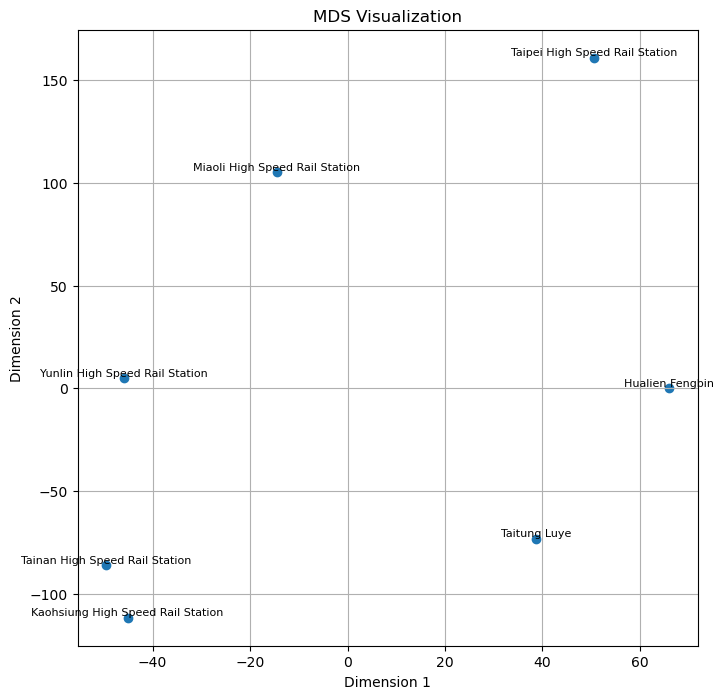

In [87]:
# 繪製2D平面

plt.figure(figsize=(8, 8))
#取出第一個維度的x座標與取出第二個維度的y座標
plt.scatter(coordinates[:, 0], coordinates[:, 1])

for label, (x, y) in zip(locations.keys(), coordinates):
    plt.text(x, y, label, fontsize=8, ha='center', va='bottom')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Visualization')
plt.grid(True)
plt.show()

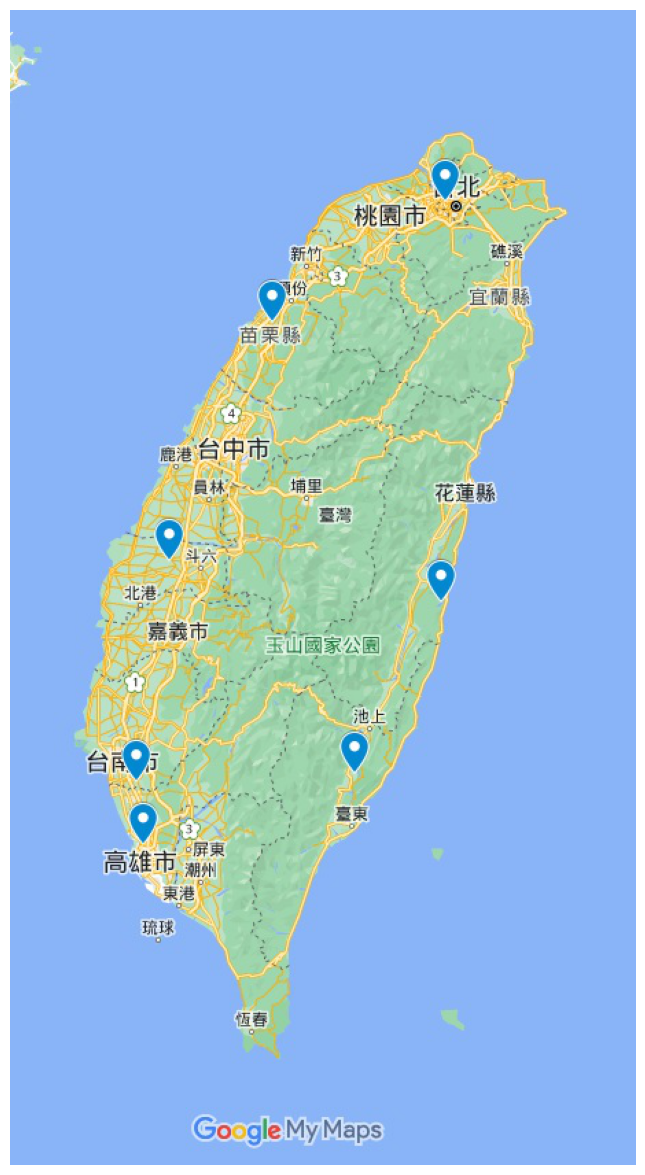

In [95]:
#顯示使用google地圖標記的位址
from PIL import Image

# 讀取圖片
image = Image.open('googlemap.jpg')
fig = plt.figure(figsize=(15, 15))
# 顯示圖片
plt.imshow(image)
plt.axis('off') 
plt.show()
